In [2]:
!pip install pandas nltk emoji

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

In [8]:
df_train = pd.read_excel('train.xlsx')
df_test = pd.read_excel('test.xlsx')

#### Sentiment Analysis

In [5]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import emoji

In [6]:
# Download required NLTK resources
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
# Remove '\n' from the 'caption' column
df_train['caption'] = df_train['caption'].str.replace('\n', ' ')
df_test['caption'] = df_test['caption'].str.replace('\n', ' ')

##### From 0 to 2 (Prefered)

In [13]:
# Function to calculate sentiment score (ignoring mentions) and rescale to [0, 2]
def calculate_sentiment_score(text):
    if isinstance(text, str):  # Check if the value is a string
        # Replace mentions with empty string
        text = " ".join([word for word in text.split() if not word.startswith('@')])
        # Calculate sentiment score using VADER (Valence Aware Dictionary and sEntiment Reasoner)
        sia = SentimentIntensityAnalyzer()
        # Get the VADER sentiment score in the range [-1, 1]
        vader_score = sia.polarity_scores(text)['compound']
        # Rescale the VADER sentiment score to the desired range [0, 2]
        rescaled_score = (vader_score + 1)  # Scaled from [-1, 1] to [0, 2]
        return rescaled_score
    return 1.0  # Return 1.0 (neutral) for non-text values

# Apply sentiment analysis to the 'caption' column and create a new 'sentiment_score' column
df_train['sentiment_score'] = df_train['caption'].apply(calculate_sentiment_score)

df_train

,username,num_followers,num_followings,post_id,day_of_week,hour,hashtags,mentions,caption,num_hashtags,num_mentions,hashtag_score,num_likes,sentiment_score
0,leanna_markoglou,23791,615,BTJVjFOAZRC,5,15,"makeup, hairstyle, youmagazine, photoshooting,...",NaN,My beauty friend.!! #makeup #hairstyle #youmag...,9,0,60654,521,1.6580
1,jls_by_dimitra,14001,1673,BSnouCMl9dx,6,13,NaN,NaN,"Πενταπλο βραχιολι ""χειροπεδα "" με μαγνητικό κο...",0,0,0,401,1.7633
2,cookingnetwork,15040,3415,BStIhYmAa4Z,1,16,"puremagic, kayak_ice_cream, icecream, lemon, l...",NaN,Lemon Grass Ice Cream 🍋 #puremagic #kayak_ice_...,10,0,51521,108,1.0000
3,annamariabarouh,12761,42,BSzRv3gD9Yx,4,1,"easter, pastel, cupcakes, adorable, delicious",NaN,Easter is coming#Easter#pastel #cupcakes #ador...,5,0,37419,250,1.0000
4,olgafarmaki,188519,997,BTPQT0Hl4pk,7,22,"clubc, reebokgreece, sneakers, sparkle, detail...",reebokgreece,Just the right amount of sparkle @reebokgreece...,7,1,25564,5168,1.4215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12567,marakiiliaki,365995,1160,BTcBN19Bp7e,5,21,havingfun,NaN,......#havingfun,1,0,7178,10463,1.0000
12568,katken85,406776,865,BTEGSIgj24a,3,14,"lovethislook, denimgirl, highheels, richmondsh...","nakshoes, gpantele, manos_haute_coiffure","""Why change? Everyone has his own style. When ...",8,3,16995,14309,1.0000
12569,elenfina,12115,582,BTBaTpBhquO,2,13,"welovegreece_, topgreecephoto, vip_world_photo...",NaN,Acrocorinth a fortress through the ages .........,28,0,0,1229,1.0000
12570,kara_sevda_daily,49713,7487,BTj7YCJljKw,1,23,"kemalsoydere, nihansezin, karasevda",NaN,67 böloüm | nihkem 🙈❤@neslihanatagul @burakozc...,3,0,0,523,1.0000


In [14]:
# Apply sentiment analysis to the 'caption' column and create a new 'sentiment_score' column
df_test['sentiment_score'] = df_test['caption'].apply(calculate_sentiment_score)

df_test

,username,num_followers,num_followings,post_id,day_of_week,hour,hashtags,mentions,caption,num_hashtags,num_mentions,hashtag_score,num_likes,sentiment_score
0,alejandroo_prince,14242,324,BTdcaOtg58P,6,10,"swimming, swimwear, pool, poolparty, spring, s...",NaN,Who wanna join for swimming 🏊??? 😍🔥🌞Wish you a...,16,0,136804,790,1.7536
1,toprwino_ant1,64507,86,BTWfHQGg2wq,3,18,"lookoftheday, toprwino",fayskorda,@fayskorda #lookoftheday #ToPrwino 💕💕🔝🔝,2,1,9163,1529,1.0000
2,super_greece,26799,294,BSykrZ5jiSo,3,19,"super_greece, shzzz_hub","simos.opasinis, ivkats, chris_navro, elenadrak...",❂ 📷 by @simos.opasinis❂ Συγχαρητήρια!❂ congrat...,2,12,0,766,1.0000
3,aggelikilib_,19336,79,BTLz_Qeh_HX,6,14,NaN,NaN,🐼,0,0,0,571,1.0000
4,omorfi5,19523,399,BTS-Djdj5NY,2,9,"kyiv, ukraine, triplets, vasilkofffamily",NaN,"Погуляли вчера по Киеву, самое веселое поездка...",4,0,11576,112,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,twinsfashionn,17690,4121,BTNBi0cBapl,7,1,"twinsfashion, invernotwins, bonslooks, shopnow",NaN,Colete faux fur maravideuso 💗 SHOP NOW 📲www.tw...,4,0,0,92,1.0000
3139,dorisliapata,12272,7305,BSvw4QVBkgT,2,17,"mycosmolook, eponymousview, instalifo",NaN,Είμαι έτοιμη για αλλαγές και είμαι σίγουρη ότι...,3,0,0,1153,1.0000
3140,oiko10,13458,3394,BSx-L0mFeXl,3,13,kai,NaN,#kai kapos etsi ta proina ksipnimata...apoktan...,1,0,8366,8933,1.0000
3141,giannis_kritikos,18106,4048,BTTS_yjjVqJ,2,12,NaN,NaN,Έτσι λοιπόν με ένα χαμόγελο ζει πάντα στις καρ...,0,0,0,657,1.0000


In [15]:
# Step 1: Get the list of column names in the DataFrame
columns_list = df_train.columns.tolist()

# Step 2: Remove 'num_likes' from the list (if it exists)
if 'num_likes' in columns_list:
    columns_list.remove('num_likes')

# Step 3: Append 'num_likes' to the end of the list
columns_list.append('num_likes')

# Step 4: Reorder the DataFrame using the updated column list
df_train = df_train[columns_list]

df_train

,username,num_followers,num_followings,post_id,day_of_week,hour,hashtags,mentions,caption,num_hashtags,num_mentions,hashtag_score,sentiment_score,num_likes
0,leanna_markoglou,23791,615,BTJVjFOAZRC,5,15,"makeup, hairstyle, youmagazine, photoshooting,...",NaN,My beauty friend.!! #makeup #hairstyle #youmag...,9,0,60654,1.6580,521
1,jls_by_dimitra,14001,1673,BSnouCMl9dx,6,13,NaN,NaN,"Πενταπλο βραχιολι ""χειροπεδα "" με μαγνητικό κο...",0,0,0,1.7633,401
2,cookingnetwork,15040,3415,BStIhYmAa4Z,1,16,"puremagic, kayak_ice_cream, icecream, lemon, l...",NaN,Lemon Grass Ice Cream 🍋 #puremagic #kayak_ice_...,10,0,51521,1.0000,108
3,annamariabarouh,12761,42,BSzRv3gD9Yx,4,1,"easter, pastel, cupcakes, adorable, delicious",NaN,Easter is coming#Easter#pastel #cupcakes #ador...,5,0,37419,1.0000,250
4,olgafarmaki,188519,997,BTPQT0Hl4pk,7,22,"clubc, reebokgreece, sneakers, sparkle, detail...",reebokgreece,Just the right amount of sparkle @reebokgreece...,7,1,25564,1.4215,5168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12567,marakiiliaki,365995,1160,BTcBN19Bp7e,5,21,havingfun,NaN,......#havingfun,1,0,7178,1.0000,10463
12568,katken85,406776,865,BTEGSIgj24a,3,14,"lovethislook, denimgirl, highheels, richmondsh...","nakshoes, gpantele, manos_haute_coiffure","""Why change? Everyone has his own style. When ...",8,3,16995,1.0000,14309
12569,elenfina,12115,582,BTBaTpBhquO,2,13,"welovegreece_, topgreecephoto, vip_world_photo...",NaN,Acrocorinth a fortress through the ages .........,28,0,0,1.0000,1229
12570,kara_sevda_daily,49713,7487,BTj7YCJljKw,1,23,"kemalsoydere, nihansezin, karasevda",NaN,67 böloüm | nihkem 🙈❤@neslihanatagul @burakozc...,3,0,0,1.0000,523


In [16]:
# Step 1: Get the list of column names in the DataFrame
columns_list = df_test.columns.tolist()

# Step 2: Remove 'num_likes' from the list (if it exists)
if 'num_likes' in columns_list:
    columns_list.remove('num_likes')

# Step 3: Append 'num_likes' to the end of the list
columns_list.append('num_likes')

# Step 4: Reorder the DataFrame using the updated column list
df_test = df_test[columns_list]

df_test

,username,num_followers,num_followings,post_id,day_of_week,hour,hashtags,mentions,caption,num_hashtags,num_mentions,hashtag_score,sentiment_score,num_likes
0,alejandroo_prince,14242,324,BTdcaOtg58P,6,10,"swimming, swimwear, pool, poolparty, spring, s...",NaN,Who wanna join for swimming 🏊??? 😍🔥🌞Wish you a...,16,0,136804,1.7536,790
1,toprwino_ant1,64507,86,BTWfHQGg2wq,3,18,"lookoftheday, toprwino",fayskorda,@fayskorda #lookoftheday #ToPrwino 💕💕🔝🔝,2,1,9163,1.0000,1529
2,super_greece,26799,294,BSykrZ5jiSo,3,19,"super_greece, shzzz_hub","simos.opasinis, ivkats, chris_navro, elenadrak...",❂ 📷 by @simos.opasinis❂ Συγχαρητήρια!❂ congrat...,2,12,0,1.0000,766
3,aggelikilib_,19336,79,BTLz_Qeh_HX,6,14,NaN,NaN,🐼,0,0,0,1.0000,571
4,omorfi5,19523,399,BTS-Djdj5NY,2,9,"kyiv, ukraine, triplets, vasilkofffamily",NaN,"Погуляли вчера по Киеву, самое веселое поездка...",4,0,11576,1.0000,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,twinsfashionn,17690,4121,BTNBi0cBapl,7,1,"twinsfashion, invernotwins, bonslooks, shopnow",NaN,Colete faux fur maravideuso 💗 SHOP NOW 📲www.tw...,4,0,0,1.0000,92
3139,dorisliapata,12272,7305,BSvw4QVBkgT,2,17,"mycosmolook, eponymousview, instalifo",NaN,Είμαι έτοιμη για αλλαγές και είμαι σίγουρη ότι...,3,0,0,1.0000,1153
3140,oiko10,13458,3394,BSx-L0mFeXl,3,13,kai,NaN,#kai kapos etsi ta proina ksipnimata...apoktan...,1,0,8366,1.0000,8933
3141,giannis_kritikos,18106,4048,BTTS_yjjVqJ,2,12,NaN,NaN,Έτσι λοιπόν με ένα χαμόγελο ζει πάντα στις καρ...,0,0,0,1.0000,657


In [17]:
# Convert to xlsx files

df_test.to_excel('test1.xlsx', index=False)
df_train.to_excel('train1.xlsx', index=False)

#### To do after you make the Approach2 Dataset

In [18]:
# Select numeric columns using the 'select_dtypes()' method
df_train = df_train.select_dtypes(include=['int64', 'float64'])
df_test = df_test.select_dtypes(include=['int64', 'float64'])

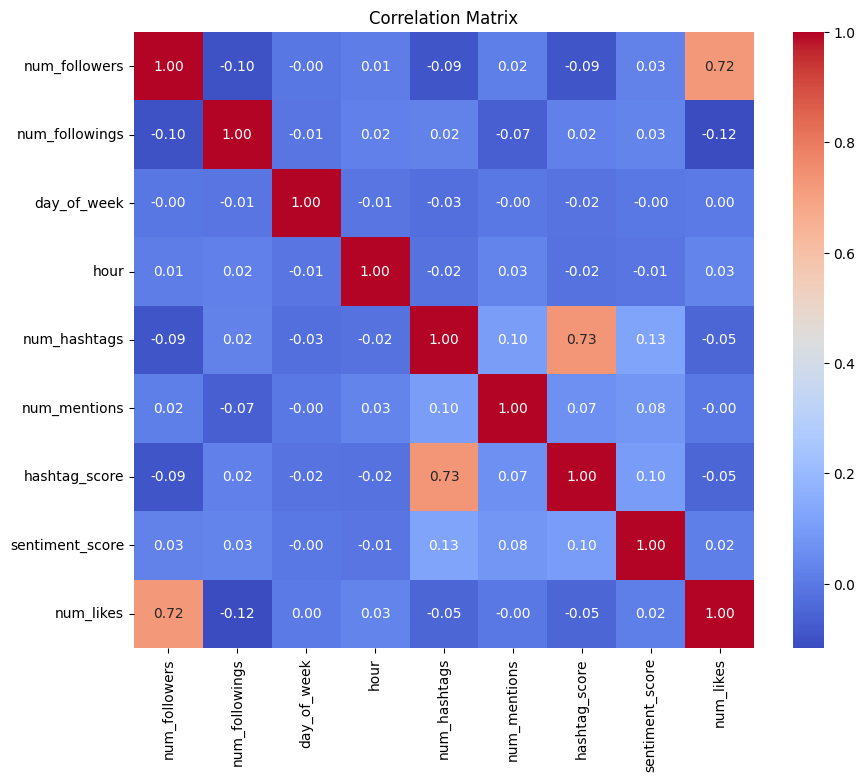

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_train.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Prepare the data
X_train, X_test = df_train.iloc[:, :-1], df_test.iloc[:, :-1]  # Features (all columns except the last one)
y_train, y_test = df_train.iloc[:, -1], df_test.iloc[:, -1]   # Target variable (last column)

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a list of regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    MLPRegressor(random_state=1, max_iter=500)
]

# Create an empty list to store the evaluation results
results_list = []

# Loop through each model
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append the model evaluation results as a dictionary to the list
    results_list.append({
        'Model': model_name,
        'MAPE': mape,
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)

# Print the DataFrame with the model evaluation results
results_df

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,MAPE,MSE,MAE,R2
0,LinearRegression,1.763504,1.658337e+07,1600.095372,0.490989
1,Ridge,1.763702,1.658357e+07,1600.096096,0.490983
2,Lasso,1.764868,1.658383e+07,1599.892320,0.490975
3,ElasticNet,2.713934,1.890016e+07,1693.351527,0.419877
4,DecisionTreeRegressor,0.530298,7.556925e+06,891.973684,0.768047
5,RandomForestRegressor,0.470401,4.988484e+06,708.891534,0.846883
6,GradientBoostingRegressor,1.661096,7.168123e+06,1157.442899,0.779981
7,KNeighborsRegressor,1.640394,1.206107e+07,1374.013872,0.629797
8,MLPRegressor,1.729848,1.622576e+07,1540.254051,0.501966


In [22]:
!pip3 install tensorflow_addons

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import warnings
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow_addons.metrics import RSquare

# Ignore all warnings
warnings.filterwarnings("ignore")

model = Sequential()
model.add(Dense(80, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

# Define custom metrics
mse = tf.keras.metrics.MeanSquaredError()
mae = tf.keras.metrics.MeanAbsoluteError()
mape = tf.keras.metrics.MeanAbsolutePercentageError()

# Compile model with the custom metrics
model.compile(loss='mse', optimizer='rmsprop', metrics=[RSquare(), mse, mae, mape])

# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Epoch 1/100
393/393 [==============================] - 6s 7ms/step - loss: 27360960.0000 - r_square: -0.1953 - mean_squared_error: 27360960.0000 - mean_absolute_error: 2195.7212 - mean_absolute_percentage_error: 88.3425 - val_loss: 34482428.0000 - val_r_square: -0.0584 - val_mean_squared_error: 34482428.0000 - val_mean_absolute_error: 2039.8962 - val_mean_absolute_percentage_error: 101.2285
Epoch 2/100
393/393 [==============================] - 2s 5ms/step - loss: 19452728.0000 - r_square: 0.1502 - mean_squared_error: 19452728.0000 - mean_absolute_error: 1869.7334 - mean_absolute_percentage_error: 253.3787 - val_loss: 23403858.0000 - val_r_square: 0.2816 - val_mean_squared_error: 23403858.0000 - val_mean_absolute_error: 2000.3771 - val_mean_absolute_percentage_error: 366.8167
Epoch 3/100
393/393 [==============================] - 2s 4ms/step - loss: 13384499.0000 - r_square: 0.4153 - mean_squared_error: 13384499.0000 - mean_absolute_error: 1859.3940 - mean_absolute_percentage_error: 37

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                720       
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3471 (13.56 KB)
Trainable params: 3471 (13.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
